In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# KnowledgeMap

<strong>Goal: </strong> Replicate the process our intellect goes through procesing new forms (or concepts, definitions). We start by trying to connect it to what already know, then we proceed to liken it to prior knowledge, or accept it's essence by faith. This approach hopes to capture the <em> way in which the thinker thought </em> regarding various concepts, not <em> what they thought</em> (you can just read their text for that). 

<strong>Approach: </strong> Collect a corpus of sequencial forms presented via a series of thoughts. As data is collected, the loosely connected concepts can connect and form a <em> knowledge map</em> connecting the ways things are presented from the mind of the thinker. 

<strong>Definitions: </strong>

$a_i = \{x_{i,1}, x_{i,2}, ..., x_{i,p_i}\} \: i \in \{1..d\}$

$N=\bigcup\limits_{i=1}^{p} a_{i}$

<strong>Example: </strong>


$x_T=form$

$k=2$

$x_{form} \rightarrow x_{matter} \rightarrow x_{potency} \: and$

$x_{form} \rightarrow x_{perfection} \rightarrow x_{God}$

# Import data

In [1]:
import json

with open("aquinas_new.json", "r") as handle:
    data = json.load(handle)
data[0]

{'volume': 'Volume 1',
 'volumeKey': 'v1',
 'questionTitle': 'Question 1. The nature and extent of sacred doctrine',
 'question': 'Question 1.',
 'questionKey': 'q1',
 'articleTitle': 'Article 1. Whether, besides philosophy, any further doctrine is required?',
 'article': 'Article 1.',
 'articleKey': 'a1',
 'articleObjections': ['Objection 1. It seems that, besides philosophical science, we have no need of any further knowledge. For man should not seek to know what is above reason: "Seek not the things that are too high for thee" (Sirach 3:22). But whatever is not above reason is fully treated of in philosophical science. Therefore any other knowledge besides philosophical science is superfluous.',
  'Objection 2. Further, knowledge can be concerned only with being, for nothing can be known, save what is true; and all that is, is true. But everything that is, is treated of in philosophical science—even God Himself; so that there is a part of philosophy called theology, or the divine sc

# Collect subjects and objects  as forms or concepts

In [21]:
import nltk
lemma = nltk.wordnet.WordNetLemmatizer()
from collections import defaultdict, Counter
import spacy
import tqdm
nlp = spacy.load('en')
from nltk.corpus import stopwords

class SequenceBuilder:
    
    SKIP_WORDS = set(['it', 'i', 'it', 'that', 'hath', 'thou', 'hast', 'that', 'who', 'it', 'which',
        'it','we', 'which', 'which', 'it', 'which', 'this', 'others',
       'things', 'things', 'things', 'they', 'what', 'he', 'most', 'words', 'word', 'something', 'them', 'thing',
            'inasmuch', 'some', 'these', 'whence', 'whatever', '1', 'whoever', 'reply', 'both', "thee", "contrary"
       ])
    
    def __init__(self, data):
        self.data = data
        
    def build(self, verbose=False):

        article_subject_sequences = defaultdict(list)
        n = len(data)
        for i, article in enumerate(self.data):
            
            if verbose:
                print(article["articleTitle"])
            if i % 350 == 0:
                print(article["questionTitle"], article["articleTitle"])
                print("%{} complete".format((i/n)*100))
            subjects = []
            for j, sentence in enumerate(nltk.sent_tokenize("\n".join([k for k in article["articleBody"]]))):
                doc = nlp(sentence)
                
                #for word in doc:
                #    if  "subj" in word.dep_ or "obj" in word.dep_: #word.dep_ == "ROOT" or
                #        dependencies.append(word.dep_)
                #        words.append(str(word))
                #print(" ".join(dependencies))
                #print(" ".join(words))
                
                dependencies = []
                words = []
                container = {"subjs":[], "objs":[]}
                for word in doc:

                    # Accept subjects and objects
                    if "subj" in word.dep_ or "obj" in word.dep_ or word.dep_ == "ROOT":
                        if not word.text.lower() in self.SKIP_WORDS:
                            
                            
                            if word.text.lower() not in stopwords.words('english'):
                                lemmatized_word = lemma.lemmatize(word.text)

                                #article_subjects.append(lemmatized_word)
                                if "subj" in word.dep_:
                                    container["subjs"].append(lemmatized_word)
                                elif "obj" in word.dep_:
                                    container["objs"].append(lemmatized_word)
                                dependencies.append(word.dep_)
                                words.append(lemmatized_word)
                article_subject_sequences[i].append(container)
                
                #if verbose:
                #    print("\t"+" ".join(dependencies))
                #    print("\t"+" ".join(words))
                    
        print("Done.")
                            

        return article_subject_sequences

sb = SequenceBuilder(data)

article_subject_sequences = sb.build(verbose = False)
article_subject_sequences[0]


Article 1. Whether, besides philosophy, any further doctrine is required?
%0.0 complete
Article 1. Whether the lights ought to have been produced on the fourth day?
%11.118170266836087 complete
Article 1. Whether the goodness of the will depends on the object?
%22.236340533672173 complete
Article 6. Whether the debt of punishment remains after sin?
%33.35451080050826 complete
Article 7. Whether we ought to love those who are better more those who are more closely united us?
%44.47268106734435 complete
Article 4. Whether the temptation of God is a graver sin than superstition?
%55.590851334180435 complete
Article 7. Whether the religious state is more perfect than that of prelates?
%66.70902160101652 complete
Article 6. Whether Christ delivered any of the lost from hell?
%77.8271918678526 complete
Article 4. Whether indulgences can be granted by one who is in mortal sin?
%88.9453621346887 complete
Done.


[{'subjs': ['Scripture'], 'objs': ['God', 'justice']},
 {'subjs': ['Scripture'], 'objs': ['God', 'science', 'reason']},
 {'subjs': [], 'objs': ['science']},
 {'subjs': [], 'objs': ['God']},
 {'subjs': [], 'objs': ['salvation', 'God', 'science', 'reason']},
 {'subjs': ['man'], 'objs': ['God', 'end', 'grasp', 'reason']},
 {'subjs': ['end'], 'objs': ['men', 'thought', 'end']},
 {'subjs': ['truth'], 'objs': ['salvation', 'man', 'reason', 'revelation']},
 {'subjs': ['reason', 'man', 'truth'],
  'objs': ['truth',
   'God',
   'revelation',
   'God',
   'reason',
   'time',
   'admixture',
   'error']},
 {'subjs': ['salvation'], 'objs': ['God', 'knowledge', 'truth']},
 {'subjs': ['salvation'], 'objs': ['order', 'men', 'truth', 'revelation']},
 {'subjs': [], 'objs': ['science', 'reason', 'revelation']}]

# Example of subjects and objects for the first article

Article 1. Whether, besides philosophy, any further doctrine is required?

The concepts traveled begin with `Scripture`, then traverse to `man` his end as `truth` which is the object of the `reason` tying this to `salvation`. The end of a thing is most proplery is perfection and sufficiency, as the end of a journey we consider complete, or sufficient, once traveled to the end. So too, Aquinas travels these concepts to explain sufficiency to Sacred `Scripture` as vehicle which will enlighten man to his sufficient end, `salvation`. But are the objects considered along the way? Many, but chiefly, `God` is the proper end, who is found via the intellect and `reason` which is natural to `science`, `salvation` is again spoken in reference to these, `end`, `grasp`,`thought`, and `knowledge` to express the nature of objects of `truth`, and of course, `relevation` which he considers the highest `truth` and means by which attainment to `God` Himself is found as `salvation`.

In [4]:
subjects = []
objects = []
for item in article_subject_sequences[0]:
    [subjects.append(i) for i in item["subjs"]]
    [objects.append(i) for i in item["objs"]]
    
Counter(subjects), Counter(objects)

(Counter({'Scripture': 2,
          'man': 2,
          'end': 1,
          'truth': 2,
          'reason': 1,
          'salvation': 2}),
 Counter({'God': 8,
          'justice': 1,
          'science': 4,
          'reason': 6,
          'salvation': 2,
          'end': 2,
          'grasp': 1,
          'men': 2,
          'thought': 1,
          'man': 1,
          'revelation': 4,
          'truth': 3,
          'time': 1,
          'admixture': 1,
          'error': 1,
          'knowledge': 1,
          'order': 1}))

# Another example,

Article 2. Whether sacred doctrine is a science?

In [17]:
article_subject_sequences[0]

[{'subjs': ['Scripture'], 'objs': ['God', 'justice']},
 {'subjs': ['Scripture'], 'objs': ['God', 'science', 'reason']},
 {'subjs': [], 'objs': ['science']},
 {'subjs': [], 'objs': ['God']},
 {'subjs': [], 'objs': ['salvation', 'God', 'science', 'reason']},
 {'subjs': ['man'], 'objs': ['God', 'end', 'grasp', 'reason']},
 {'subjs': ['end'], 'objs': ['men', 'thought', 'end']},
 {'subjs': ['truth'], 'objs': ['salvation', 'man', 'reason', 'revelation']},
 {'subjs': ['reason', 'man', 'truth'],
  'objs': ['truth',
   'God',
   'revelation',
   'God',
   'reason',
   'time',
   'admixture',
   'error']},
 {'subjs': ['salvation'], 'objs': ['God', 'knowledge', 'truth']},
 {'subjs': ['salvation'], 'objs': ['order', 'men', 'truth', 'revelation']},
 {'subjs': [], 'objs': ['science', 'reason', 'revelation']}]

# Get the subject and all of it's objects

In [73]:
from collections import defaultdict
subjects = defaultdict(list)
#subjects = []
#objects = []
for i in range(len(article_subject_sequences)):
    package = article_subject_sequences[i]
    for item in package:
        for subj in item["subjs"]:
            for obj in item["objs"]:
                subjects[subj].append(obj)
    #[subjects.append(i) for i in item["subjs"]]
    #[objects.append(i) for i in item["objs"]]
    
#Counter(subjects), Counter(objects)
subjects

defaultdict(list,
            {'Scripture': ['God',
              'justice',
              'God',
              'science',
              'reason',
              'science',
              'knowledge',
              'formality',
              'formality',
              'object',
              'science',
              'doctrine',
              'science',
              'doctrine',
              'doctrine',
              'gainsayers',
              'science',
              'one',
              'principle',
              'truth',
              'revelation',
              'heretic',
              'text',
              'Writ',
              'article',
              'faith',
              'another',
              'relation',
              'God',
              'procession',
              'faith',
              'faith',
              'instance',
              'Elcana',
              'time',
              'time',
              'angel',
              'Abraham',
              'family',
              

# Find similar subjects (i.e., those who share the most number of objects)

In [74]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

rowids = list(subjects.keys())
corpus = [" ".join(i) for i in list(subjects.values())]
cv = CountVectorizer().fit(corpus)
X = cv.transform(corpus)
X.shape

(3711, 5107)

In [75]:
S = X.dot(X.T).todense()
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        if i == j:
            S[i,j]=0
S.shape

(3711, 3711)

In [76]:
import pandas as pd
df_S = pd.DataFrame(S, columns = rowids, index=rowids)
df_S.head()

Scripture     man    end  truth  reason  salvation   xiv  saving  \
Scripture          0    9268    518    423    1488         99    61      11   
man             9268       0  82456  35510  199030      10311  6982     210   
end              518   82456      0   2737   16470        570   370       7   
truth            423   35510   2737      0    6367        398   178      27   
reason          1488  199030  16470   6367       0       1401   994      27   

           doctrine  musician  ...  heaviness  obstinate  twofold  deemed  \
Scripture        97         7  ...          0          0        0       0   
man            6553       565  ...        188         80        1     267   
end             388        34  ...         12          0        0      92   
truth           335        17  ...          2          0        0       0   
reason         1272        83  ...         50          9        0      62   

           heresiarchs  merciful  Nazianzen  longing  cautery  deem  
Scripture            3         1          1        0        0     1  
man                 97        18        582      745      216   256  
end                  2         0        108       46       24    16  
truth               14         0         10       15        1    16  
reason              14         0         89       96       40    50  

[5 rows x 3711 columns]

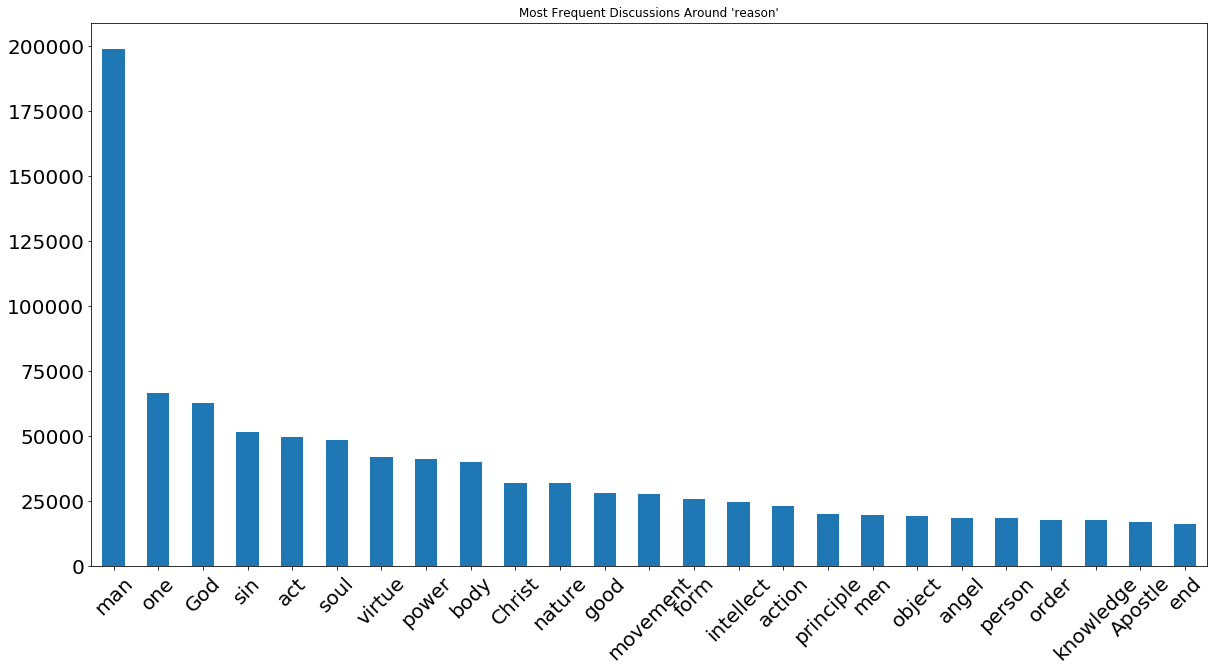

In [111]:
import matplotlib.pyplot as plt
term = "reason"
df_S[term].sort_values(ascending=False)[:25].plot(kind='bar', figsize=(20,10), fontsize=20, title = "Most Frequent Discussions Around '{}'".format(term), rot=45)


# Create a node class for concepts

In [79]:
class Node:
    def __init__(self, content, source=None, sink=None):
        if source:
            assert isinstance(source, Node), "source must be of type Node"
        if sink:
            assert isinstance(sink, Node), "sink must be of type Node"
        self.content = content
        self.source = source
        self.sink = sink
        
    def __str__(self):
        return self.content
    
    def __repr__(self):
        return self.content
        
n = Node("stuff")
n

stuff

# For each concept create a node

In [97]:
docs = list(map(lambda x:x[1], article_subject_sequences.items()))
n = len(docs)
doc_nodes = []
for i in range(n):
    doc = docs[i]
    m = len(doc)
    tmp_nodes = []
    for j in range(m):
        concept = doc[j]
        tmp = Node(concept)
        tmp_nodes.append(tmp)
    doc_nodes.append(tmp_nodes)
doc_nodes[0]

[Scripture,
 God,
 justice,
 Scripture,
 God,
 science,
 science,
 God,
 salvation,
 God,
 science,
 man,
 God,
 end,
 grasp,
 end,
 men,
 thought,
 end,
 salvation,
 man,
 truth,
 revelation,
 truth,
 God,
 man,
 revelation,
 truth,
 God,
 time,
 admixture,
 error,
 salvation,
 God,
 knowledge,
 truth,
 order,
 salvation,
 men,
 truth,
 revelation,
 science,
 revelation]

# Update the sources and sinks for nodes

In [99]:

n = len(doc_nodes)
for i in range(n):
    doc_nodes_i = doc_nodes[i]
    m = len(doc_nodes_i)
    for j in range(m-1):
        concept_node_ij = doc_nodes_i[j]
        concept_node_ij.sink = doc_nodes_i[j+1]
        doc_nodes_i[j+1].source = concept_node_ij

# Confirm connections with nodes

In [105]:
for d in doc_nodes[:1]:
    for n in d:
        print(n.content, n.source, n.sink)


Scripture None God
God Scripture justice
justice God Scripture
Scripture justice God
God Scripture science
science God science
science science God
God science salvation
salvation God God
God salvation science
science God man
man science God
God man end
end God grasp
grasp end end
end grasp men
men end thought
thought men end
end thought salvation
salvation end man
man salvation truth
truth man revelation
revelation truth truth
truth revelation God
God truth man
man God revelation
revelation man truth
truth revelation God
God truth time
time God admixture
admixture time error
error admixture salvation
salvation error God
God salvation knowledge
knowledge God truth
truth knowledge order
order truth salvation
salvation order men
men salvation truth
truth men revelation
revelation truth science
science revelation revelation
revelation science None


# Build the dataset

nodeName, fromName, toName, count

In [118]:
import pandas as pd
data_raw = []
for d in doc_nodes[:1]:
    for n in d:
        data_raw.append([n.content,str(n.source), str(n.sink)])
        
data_raw

[['Scripture', 'None', 'God'],
 ['God', 'Scripture', 'justice'],
 ['justice', 'God', 'Scripture'],
 ['Scripture', 'justice', 'God'],
 ['God', 'Scripture', 'science'],
 ['science', 'God', 'science'],
 ['science', 'science', 'God'],
 ['God', 'science', 'salvation'],
 ['salvation', 'God', 'God'],
 ['God', 'salvation', 'science'],
 ['science', 'God', 'man'],
 ['man', 'science', 'God'],
 ['God', 'man', 'end'],
 ['end', 'God', 'grasp'],
 ['grasp', 'end', 'end'],
 ['end', 'grasp', 'men'],
 ['men', 'end', 'thought'],
 ['thought', 'men', 'end'],
 ['end', 'thought', 'salvation'],
 ['salvation', 'end', 'man'],
 ['man', 'salvation', 'truth'],
 ['truth', 'man', 'revelation'],
 ['revelation', 'truth', 'truth'],
 ['truth', 'revelation', 'God'],
 ['God', 'truth', 'man'],
 ['man', 'God', 'revelation'],
 ['revelation', 'man', 'truth'],
 ['truth', 'revelation', 'God'],
 ['God', 'truth', 'time'],
 ['time', 'God', 'admixture'],
 ['admixture', 'time', 'error'],
 ['error', 'admixture', 'salvation'],
 ['salva

In [139]:
df = pd.DataFrame(data_raw, columns = ["Node_Name", "Source_Node", "Sink_Node"])
df_counts = df.groupby("Node_Name").count().reset_index()[["Node_Name", "Source_Node"]]
df_counts.columns = ["Node_Name", "Count"]
df_merge= df.merge(df_counts, on="Node_Name", how="inner")
df_merge

Node_Name Source_Node   Sink_Node  Count
0    Scripture        None         God      2
1    Scripture     justice         God      2
2          God   Scripture     justice      8
3          God   Scripture     science      8
4          God     science   salvation      8
5          God   salvation     science      8
6          God         man         end      8
7          God       truth         man      8
8          God       truth        time      8
9          God   salvation   knowledge      8
10     justice         God   Scripture      1
11     science         God     science      4
12     science     science         God      4
13     science         God         man      4
14     science  revelation  revelation      4
15   salvation         God         God      4
16   salvation         end         man      4
17   salvation       error         God      4
18   salvation       order         men      4
19         man     science         God      3
20         man   salvation       truth      3
21         man         God  revelation      3
22         end         God       grasp      3
23         end       grasp         men      3
24         end     thought   salvation      3
25       grasp         end         end      1
26         men         end     thought      2
27         men   salvation       truth      2
28     thought         men         end      1
29       truth         man  revelation      5
30       truth  revelation         God      5
31       truth  revelation         God      5
32       truth   knowledge       order      5
33       truth         men  revelation      5
34  revelation       truth       truth      4
35  revelation         man       truth      4
36  revelation       truth     science      4
37  revelation     science        None      4
38        time         God   admixture      1
39   admixture        time       error      1
40       error   admixture   salvation      1
41   knowledge         God       truth      1
42       order       truth   salvation      1

In [142]:
import networkx as nx
G=nx.from_pandas_dataframe(df, "Source_Node", "Sink_Node", ['Node_Name', 'Count'])

AttributeError: module 'networkx' has no attribute 'from_pandas_dataframe'

  Attempting uninstall: networkx
    Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4
